In [ ]:
#1. The SMS Spam Collection v.1 is a public set of SMS labeled messages that have been collected for mobile phone spam research.
#It has one collection composed by 5,574 English, real and non-enconded messages, tagged according being legitimate (ham) or spam.
#Identification of Ham/Spam is an interesting usecase of NLP(Natural Language Processing).

In [ ]:
#2. Objective -The objective of this assignment is to predict the likeliness of email being spam or ham.

In [ ]:
#3. Installing and importing libraries

In [1]:
#!pip install -q datascience                   # Package that is required by pandas profiling
#!pip install -q pandas-profiling              # Library to generate basic statistics about data

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
ydata-profiling 4.8.3 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [ ]:
#After upgrading the libraries, you need to restart the runtime to make the libraries in sync.
#Make sure not to execute the cell above and below again after restarting the runtime.

In [2]:
#!pip install -q --upgrade pandas-profiling

In [184]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string                                                       # For string related operations
import pprint                                                       # For printing of Collections line by line



from sklearn.feature_extraction.text import CountVectorizer           #To perform bag of words from data
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from collections import Counter                                     # For estimating frequency


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once


In [ ]:
#4. Data Acquisition and Description

#The dataset contains 5572 rows and 5 columns. The description of the variable is as under:-

#Id	Feature	Description
#01	v1	Whether an email is ham or spam. Contains: [ham, spam]
#02	v2	It is the email message sent to and fro between sender and receiver.
#03	Unnamed: 2	Irrelevant and Un-necessary feature.
#04	Unnamed: 3	Irrelevant and Un-necessary feature.
#05	Unnamed: 4	Irrelevant and Un-necessary feature.

In [185]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/spam.csv', encoding = 'latin1')
print('Data Shape:', data.shape)

data.head()


#Before diving further let's rename the features and drop un-necessary features.
#Additionally, we will create a new feature out of the Message le

Data Shape: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [186]:
# Bringing changes in the dataset

def modify_data(data):
    #Renaming features
    data.rename(mapper = {'v1': 'Label', 'v2': 'Message'}, axis=1, inplace=True)
    
    #dropping unnecessary features
    data.drop(labels= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
    
    #adding new feature named as length
    data['Length'] = data['Message'].apply(len)
    
    return data

In [187]:
data = modify_data(data)

In [188]:
data.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [189]:
#4.1 Data Description

#Getting descritption about the data

data.describe()

,Length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [190]:
data.info()

#There are no missing values.
#Only one variable is numberical. Other are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
 2   Length   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [191]:
#checking duplicate value

duplicate_values = data.duplicated()
print(duplicate_values)

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool


In [192]:
#removing duplicate values

def handle_duplicates(data):
    
    before_shape = data.shape
    print('Data Shape [Before] : ',before_shape)
    
    data.drop_duplicates(inplace=True)
    
    after_shape = data.shape
    print('Data Shape [After] : ', after_shape)
    
    drop_nums = before_shape[0] - after_shape[0]
    drop_percent = np.round(drop_nums/before_shape[0], decimals =5 )*100
    
    print('Drop Ratio: ', drop_percent, '%')
    

In [193]:
handle_duplicates(data)

Data Shape [Before] :  (5572, 3)
Data Shape [After] :  (5169, 3)
Drop Ratio:  7.2330000000000005 %


In [194]:
#Checking duplicates in data

print('Contains redundant records?:', data.duplicated().any())
print('Duplicate count: ', data.duplicated().sum())

Contains redundant records?: False
Duplicate count:  0


In [ ]:
#6. Exploratory Data Analysis

In [195]:
#Plot distribution of message length

def plotLenght():
    figure = plt.figure(figsize = [15, 7])
    sns.distplot(a = data['Length'], color = 'purple')
    plt.xlabel('Length', size = 14)
    plt.ylabel('Density', size = 14)
    plt.title('Distribution of Message Length', size = 16)
    plt.show()

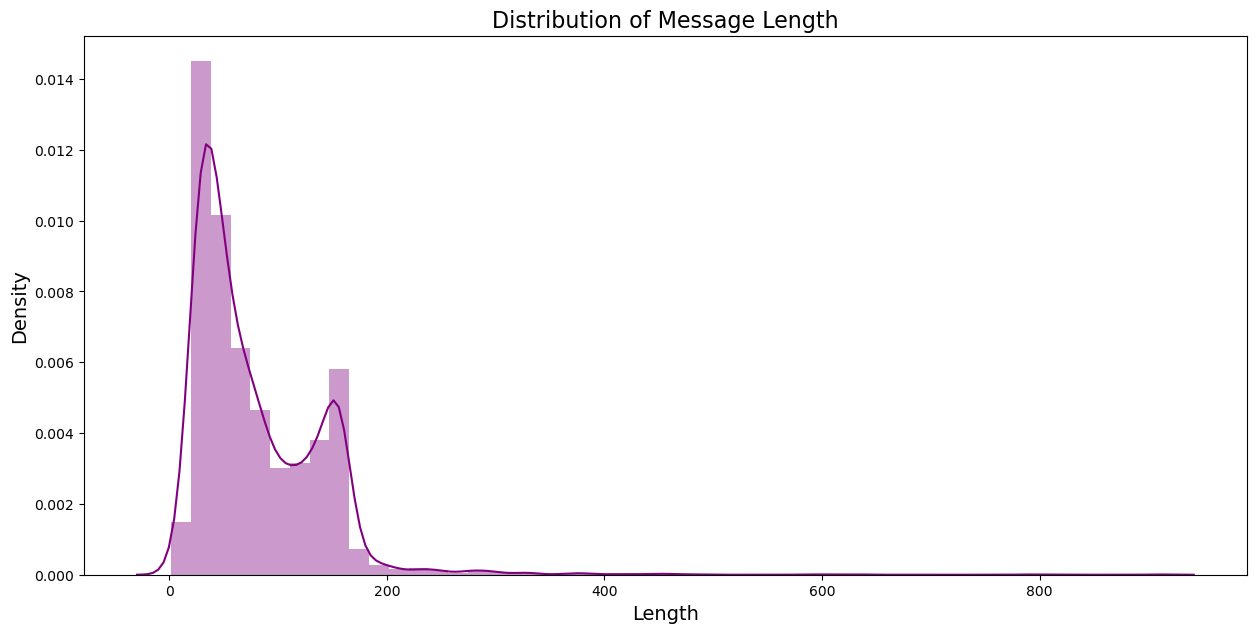

In [196]:
plotLenght()

#Mostly length of the message was between 0-200.

In [ ]:
#7. Post Data Processing

#Now we will transform our data into compatible format so that machine can understand.
#Our data set contains 5572 number of rows and these will be converted into bag of words.
#But before that we need to clean the text message by
#Removing stopwords, punctuations, delimeters, alphanumerics,
#Converting all the words in lowercase.
#We will then create a vector space of words as features and their row cells will contains the respective value (1 or 0).
#We then use the tokenized words for each observation and find out the frequency of each token.

In [197]:
#7.1 Bag of words

documents = ['Hello! How are you!',
            'Win money, win from home.',
            'Call me now.',
            'Hello, Call hello you tomorrow?']

In [198]:
data.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [199]:
#7.2 Split data into independent and dependent variable

data.loc[:,'Label'] = data['Label'].map({'ham': 0, 'spam': 1})

In [200]:
data.head()

,Label,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [201]:
X = data.loc[ : , data.columns!='Label']
X.head()

,Message,Length
0,"Go until jurong point, crazy.. Available only ...",111
1,Ok lar... Joking wif u oni...,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,U dun say so early hor... U c already then say...,49
4,"Nah I don't think he goes to usf, he lives aro...",61


In [203]:
y=data.Label

y.head()

0    0
1    0
2    1
3    0
4    0
Name: Label, dtype: int64

In [ ]:
#7.3 Count Vectorize X dataset


In [206]:
def countVectorTransform(data, stopwords=None):

  countVector = CountVectorizer(lowercase=True, token_pattern='(?u)\\b\\w\\w+\\b', stop_words='english')

  docArray = countVector.fit_transform(data).toarray()

  frequency_matrix = pd.DataFrame(data=docArray, columns=countVector.get_feature_names())

  return frequency_matrix
    
    
    

# (?u) means property of Characters of 4 bytes are handled correctly
# https://javascript.info/regexp-unicode#:~:text=Summary,%3A%20%5Cp%7B%E2%80%A6%7D%20.
# We can search for characters with a property, written as \p{…}. To use \p{…}, a regular expression must have flag u.

#lowercase: The lowercase parameter has a default value of True which converts all of our text to its lower case form.
#token_pattern: The token_pattern parameter has a default regular expression value of - (?u)\\b\\w\\w+\\b which ignores 
 #              all punctuation marks and treats them as delimiters, while accepting alphanumeric strings of length 
 #              greater than or equal to 2, as individual tokens or words.
#stop_words: The stop_words parameter, if set to english will remove all words from our document set that match a list of 
 #           English stop words which is defined in scikit-learn. 

In [207]:
frequency_matrix = countVectorTransform(data = documents)
frequency_matrix

,hello,home,money,tomorrow,win
0,1,0,0,0,0
1,0,1,1,0,2
2,0,0,0,0,0
3,2,0,0,1,0


In [208]:
#Vectorizing the X dataset
X = countVectorTransform(data= data['Message'], stopwords='english')


In [209]:
X.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Label, dtype: int64

In [212]:
#7.4 Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (4135, 8404) (4135,)
Testing Data Shape: (1034, 8404) (1034,)


In [ ]:
#8. Model Developement and Evaluation

#In this section we will develop Multinomial Naive Bayes and tune our model if required.

#Then we will analyze the results obtained and make our observation.

# For evaluation purpose we will focus on precision and recall value for positive class i.e. spam class.


In [218]:
#8.1 model building using Multinomial Naive Bayes over training data using default setting


  
naive = MultinomialNB()
naive.fit(X_train, y_train)



#Bernoulli Naive bayes is good at handling boolean/binary attributes, while Multinomial Naive 
#bayes is good at handling discrete values and Gaussian naive bayes is good at handling continuous values

MultinomialNB()

In [219]:
#8.2 Making predictions using train and test data

y_pred_train = naive.predict(X_train)
y_pred_test = naive.predict(X_test)


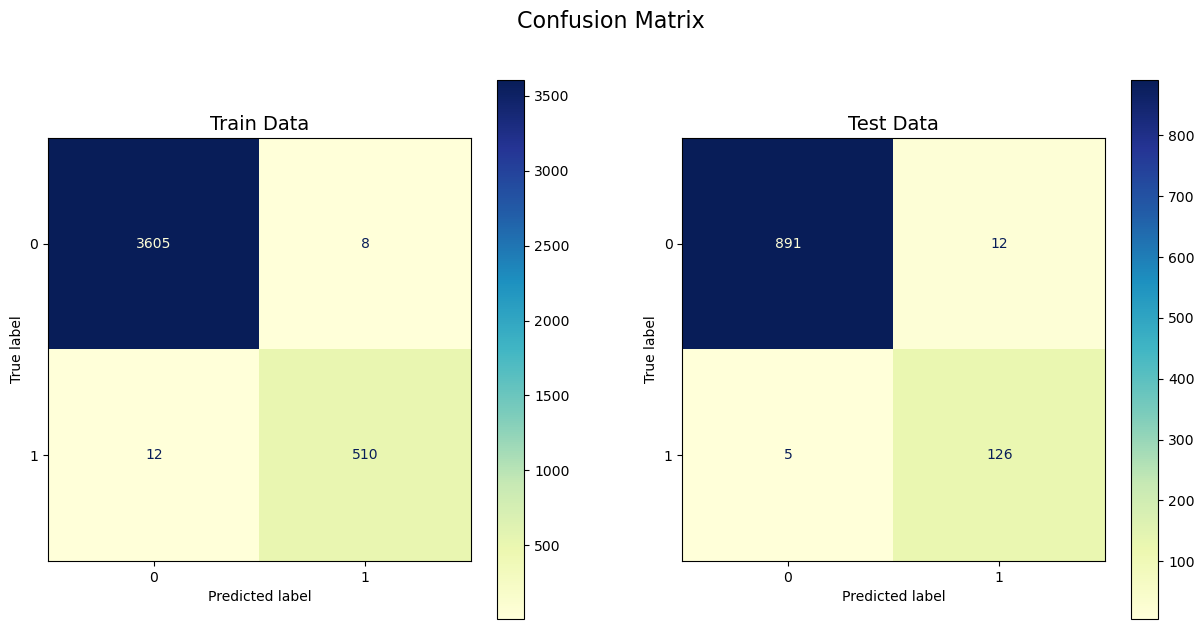

In [220]:
# 8.3 Plotting confusion matrix

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=naive, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=naive, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [ ]:
#Interpretation

#The train data showcased that true negative ham messages were 3605, false negative were 8, true positive spam messages 
#were 510 and 12 were false positive.

#The test data showcased that true negative ham messages were 891, false negative were 12, true positive spam messages 
#were 126 and false positive were 5. 

In [221]:
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

#The difference in the accuracy score of train and test data is less than 5%. Thus the model is fitted well on
#test data. 

#We can see that model is working pretty well in identifying spam messages.
#This model now can help us in identifying which message is spam and which one is not.

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3613
           1       0.98      0.98      0.98       522

    accuracy                           1.00      4135
   macro avg       0.99      0.99      0.99      4135
weighted avg       1.00      1.00      1.00      4135

                    Testing Report           
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.91      0.96      0.94       131

    accuracy                           0.98      1034
   macro avg       0.95      0.97      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [222]:
y_train_pred_proba = naive.predict_proba(X_train)
y_test_pred_proba = naive.predict_proba(X_test)

In [225]:
#8.4 plotting precision and recall curve

def plotPRCurve():
  figure = plt.figure(figsize = [15, 7])
  plt.subplot(1, 2, 1)
  plot_precision_recall(y_true = y_train, y_pred = y_train_pred_proba[:,1], train_or_test ='Train Data')

  plt.subplot(1, 2, 2)
  plot_precision_recall(y_true = y_test, y_pred = y_test_pred_proba[:, 1], train_or_test = 'Test Data')

  plt.suptitle('Precision & Recall Curve', size = 16)
  plt.show()

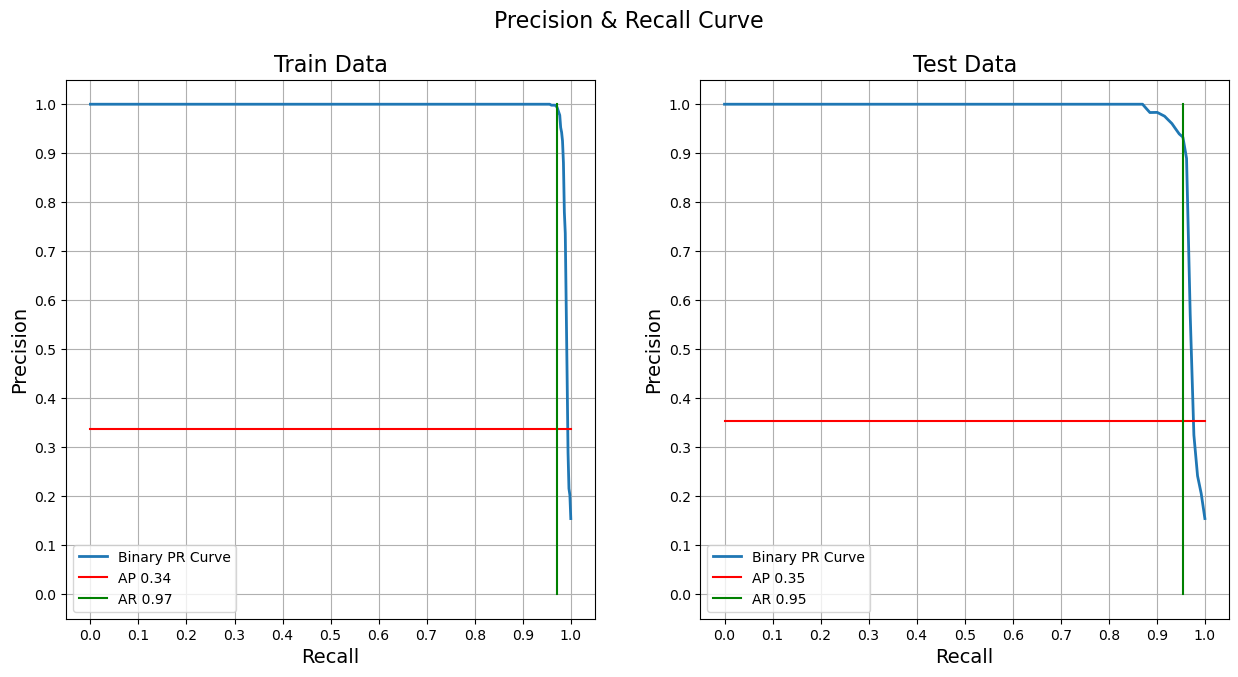

In [226]:
plotPRCurve()

#The precision-recall curve shows the tradeoff between precision and recall for different threshold. 
#A high area under the curve represents both high recall and high precision, where high precision relates 
#to a low false positive rate, and high recall relates to a low false negative rate.

#Precision shows how often an ML model is correct when predicting the target class.
#Recall shows whether an ML model can find all objects of the target class.

In [ ]:
#9. Conclusion

#We can see that model is working pretty well in identifying spam messages.
#This model now can help us in identifying which message is spam and which one is not.